In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.datasets import fetch_covtype
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from xgboost import plot_importance
import joblib

In [2]:
#covertype = fetch_covtype()
#X = covertype.data
#y = covertype.target

#data = pd.DataFrame(data = X, columns=covertype.feature_names).astype(int)
#data['Cover_Type'] = covertype.target.astype(int)
# data.to_csv("entire_dataset_forest.csv")

data = pd.read_csv("entire_dataset_forest.csv")

In [3]:
data.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,0,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,1,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,2,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,3,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,4,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.shape

(581012, 55)

In [6]:
data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'S

Quick Summary of the numerical features

In [7]:
data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']].describe()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


Mean of the features vary from as low as 14 to as high as 2959 having very different ranges (should be scaled later for SVM)
Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points are the most spread numerical features followed by Elevation.

Checking for null values

In [8]:
# Checking for null values
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


There are no null values

Checking the data types and other information about the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_0                   581012 non-null  int64
 11  Wilderness_Area_1                   581012 non-null 

Distribution of the target

In [10]:
data['Cover_Type'].value_counts(normalize=True) * 100

Cover_Type
2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: proportion, dtype: float64

The target class is quite unevenly distributed. This calls for resampling techniques. 

Skewness of the numerical features

In [11]:
data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']].skew()


Elevation                            -0.817596
Aspect                                0.402628
Slope                                 0.789273
Horizontal_Distance_To_Hydrology      1.140437
Vertical_Distance_To_Hydrology        1.790250
Horizontal_Distance_To_Roadways       0.713679
Hillshade_9am                        -1.181147
Hillshade_Noon                       -1.063056
Hillshade_3pm                        -0.277053
Horizontal_Distance_To_Fire_Points    1.288644
dtype: float64

Elevation: is negatively skewed indicating that there are more high elevation values with a few areas of low elevation

Aspect, Slope, and Horizontal_Distance_To_Roadways are mildly positively skewed indicating that the majority of the values are concentrated on the lower end

Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, and Horizontal_Distance_To_Fire_Points are significantly high positive skewness indicating that most observations are relatively close to water bodies. 

 Vertical_Distance_To_Hydrology indicates some areas significantly higher or lower in elevation than the nearest water body.

Hillshade_9am , Hillshade_Noon high negative skewness indicating that most areas receive more direct sunlight in the morning and afternoon, with fewer areas receiving less.

Hillshade_3pm A mild negative skew, indicating while most areas receive more sunlight in the afternoon, there are fewer areas that receive significantly less.

## EDA

Text(0, 0.5, 'Percentage')

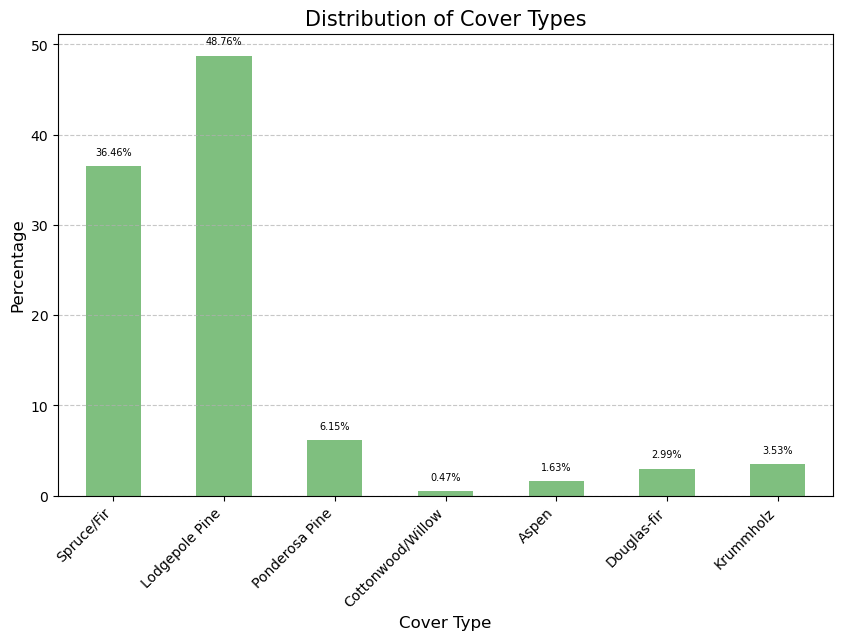

In [12]:
# Define the target class names
target_class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

# Plot the distribution of cover types as percentages
cover_type_counts = data['Cover_Type'].value_counts(normalize=True) * 100

# Plot the distribution of cover types as percentages
ax = cover_type_counts.sort_index().plot(kind='bar', color='green', alpha=0.5)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

# Set the x-axis tick labels to the target class names
plt.xticks(ticks=range(len(target_class_names)), labels=target_class_names, rotation=45, ha='right', fontsize=10)
plt.gcf().set_size_inches(10, 6) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  

# Add title and labels
plt.title('Distribution of Cover Types', fontsize=15)
plt.xlabel('Cover Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

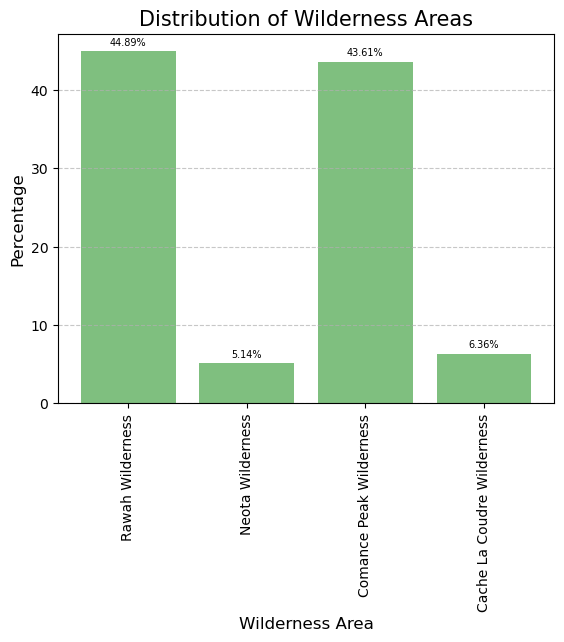

In [13]:
wilderness_areas_count = []
for col in data.columns:
    if col.startswith('Wilderness_Area'):
        wilderness_areas_count.append(data[col].sum())

total = sum(wilderness_areas_count)
wilderness_areas_percent = [count / total * 100 for count in wilderness_areas_count]

plt.bar(['Rawah Wilderness', 'Neota Wilderness', 'Comance Peak Wilderness', 'Cache La Coudre Wilderness'], wilderness_areas_percent, color='green', alpha=0.5)

plt.title('Distribution of Wilderness Areas', fontsize=15)
plt.xlabel('Wilderness Area', fontsize=12)

for i, v in enumerate(wilderness_areas_percent):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom', fontsize=7)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

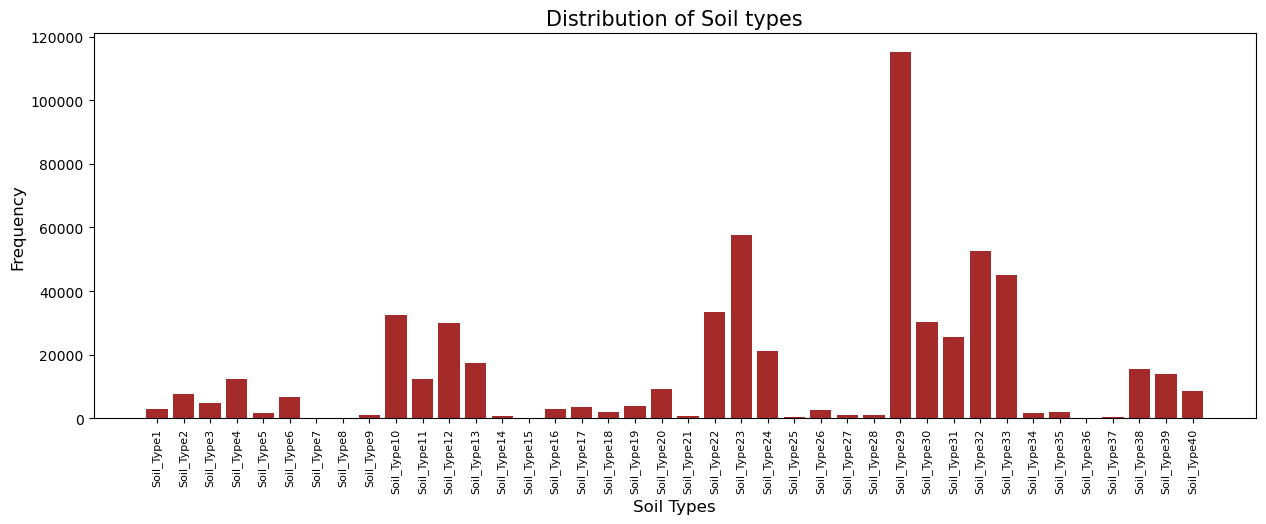

In [14]:
soil_type_count = []
for col in data.columns:
    if col.startswith('Soil_Type'):
       soil_type_count.append(data[col].sum())

soil_types = ['Soil_Type' + str(i) for i in range(1, 41)]

plt.bar(soil_types, soil_type_count, color='brown')
plt.title('Distribution of Soil types', fontsize=15)
plt.xlabel('Soil Types', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, fontsize=8)  # Adjust the fontsize to increase spacing
plt.gcf().set_size_inches(15, 5)  # Resize the figure
plt.show()

There are 40 soil types and most of them are very low in number. We might want to get rid of some of the least frequently occuring categories. This will be dealt with in the later sections

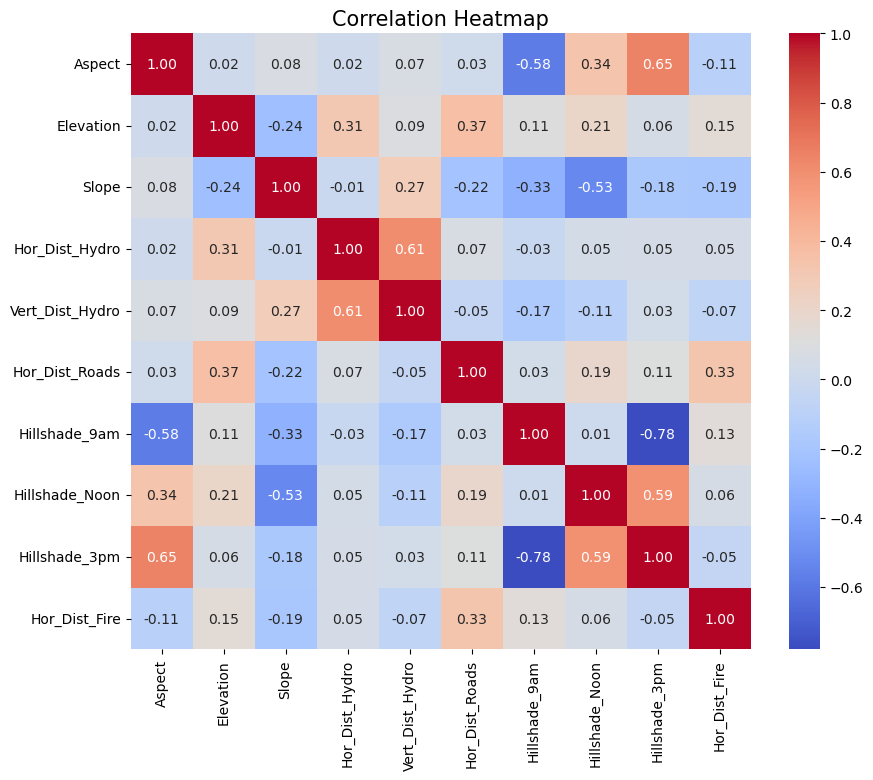

In [15]:
# Shorten the column names for better readability
shortened_columns = {'Aspect' : 'Aspect',
    'Elevation': 'Elevation',
    'Slope': 'Slope',
    'Horizontal_Distance_To_Hydrology': 'Hor_Dist_Hydro',
    'Vertical_Distance_To_Hydrology': 'Vert_Dist_Hydro',
    'Horizontal_Distance_To_Roadways': 'Hor_Dist_Roads',
    'Hillshade_9am': 'Hillshade_9am',
    'Hillshade_Noon': 'Hillshade_Noon',
    'Hillshade_3pm': 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points': 'Hor_Dist_Fire'
}

# Rename the columns in the dataframe
X_shortened = data.rename(columns=shortened_columns)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_shortened[list(shortened_columns.values())].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

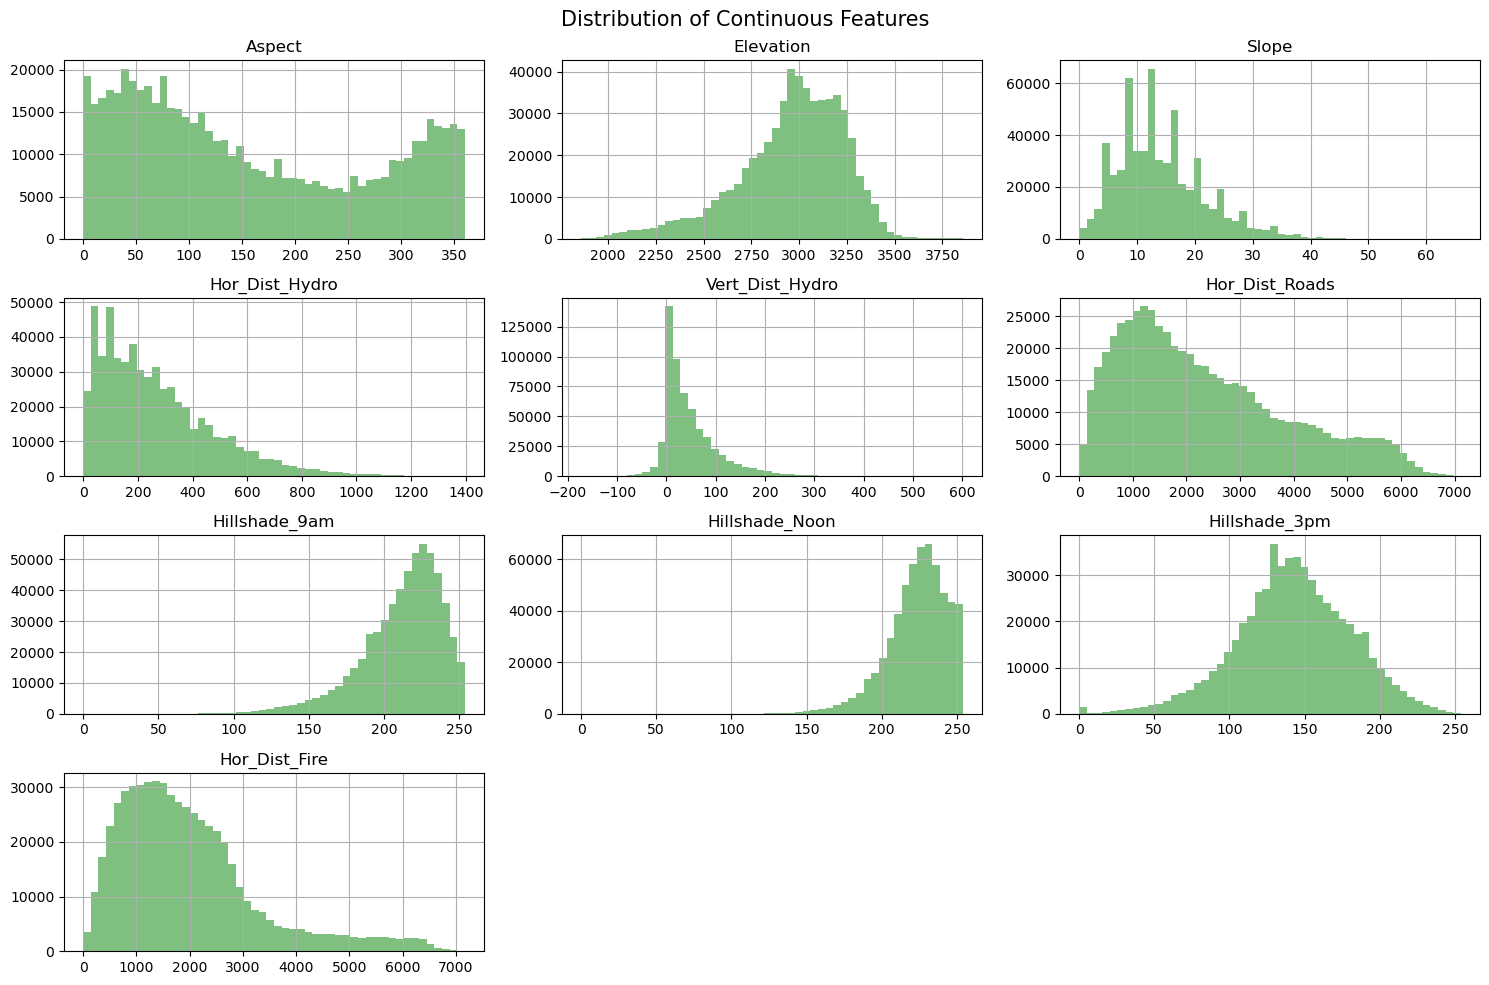

In [16]:
# How the continuous features are distributed
X_shortened[list(shortened_columns.values())].hist(bins=50, figsize=(15, 10), color='green', alpha=0.5)
plt.suptitle('Distribution of Continuous Features', fontsize=15)
plt.tight_layout()
plt.show()

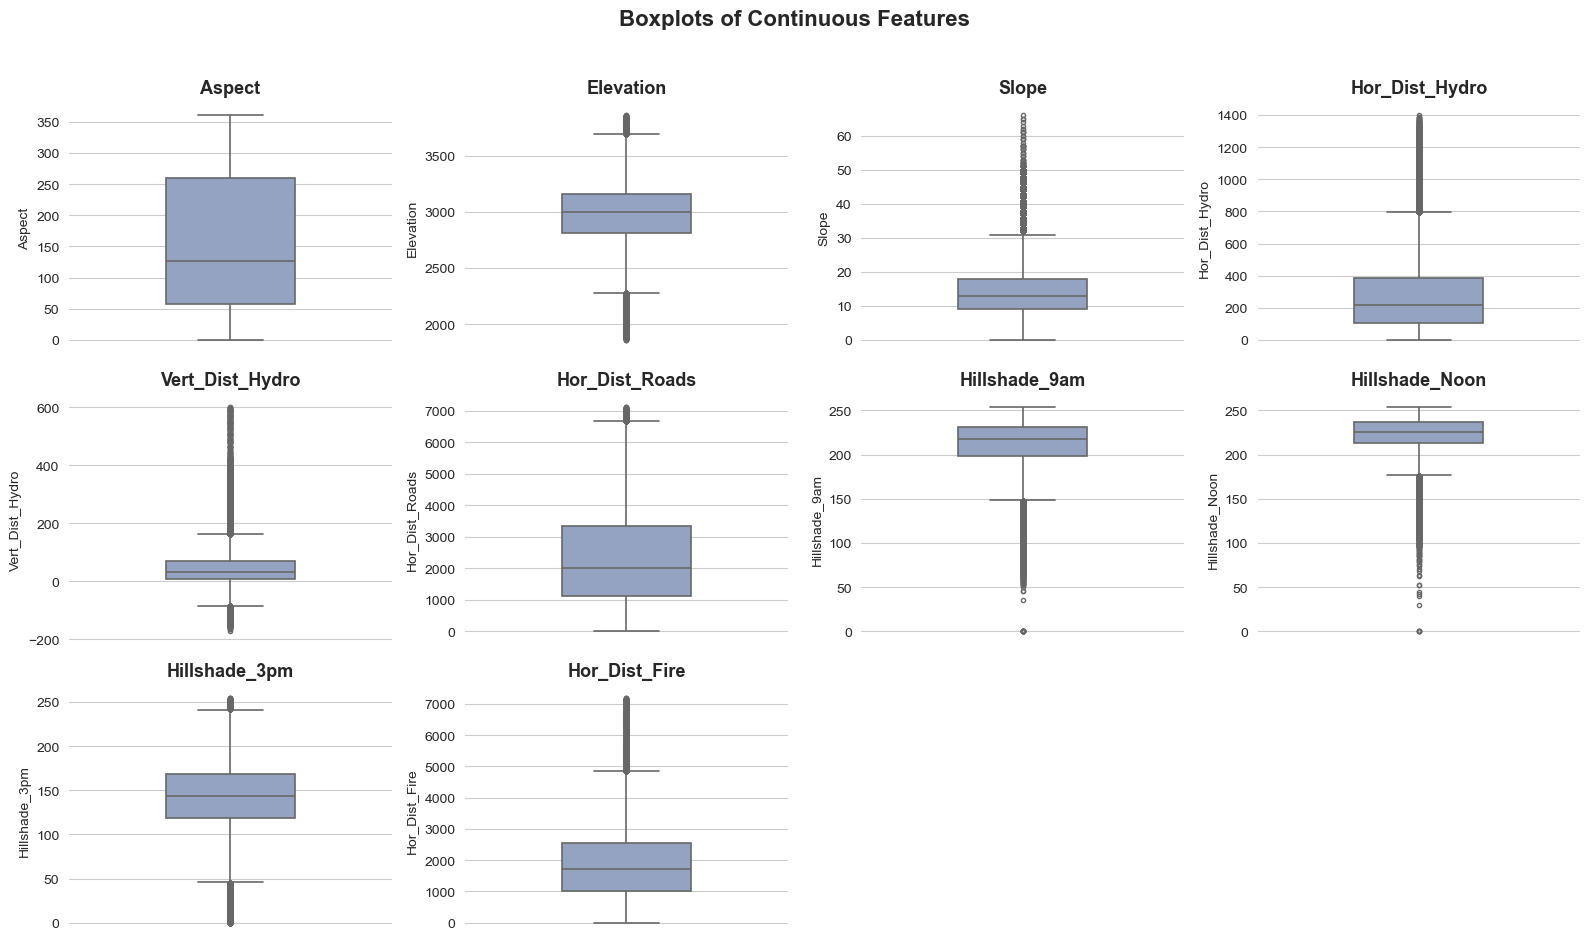

In [17]:

sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))

box_color = sns.color_palette("Set2")[2] 

for i, col in enumerate(list(shortened_columns.values())):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=X_shortened[col], color=box_color, width=0.4, linewidth=1.2, fliersize=3)  
    plt.title(col, fontsize=13, fontweight='bold', pad=8) 
    plt.xlabel("")  
    plt.xticks([])  
plt.suptitle('Boxplots of Continuous Features', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.04, 1, 0.96]) 
sns.despine(left=True, bottom=True) 

plt.show()


Aspect:- uniformally distibuted with no outliers (values spread out evenly)

Slope:- Very squeezed with the least range of values compared to all features (lots of outliers on the high end)

Horizontal_Distance_To_Hydrology and Horizontal_Distance_To_Roadways , Horizontal_Distance_To_Fire_Points  right skewed with significant outliers that are far from water / roadway / Fire points

Hillshade_9am, Hillshade_Noon, and Hillshade_3pm have smaller ranges (indexed 0-255). their distributions that are slightly left-skewed (for 9am and noon) and right-skewed (for 3pm), with several outliers on the lower 

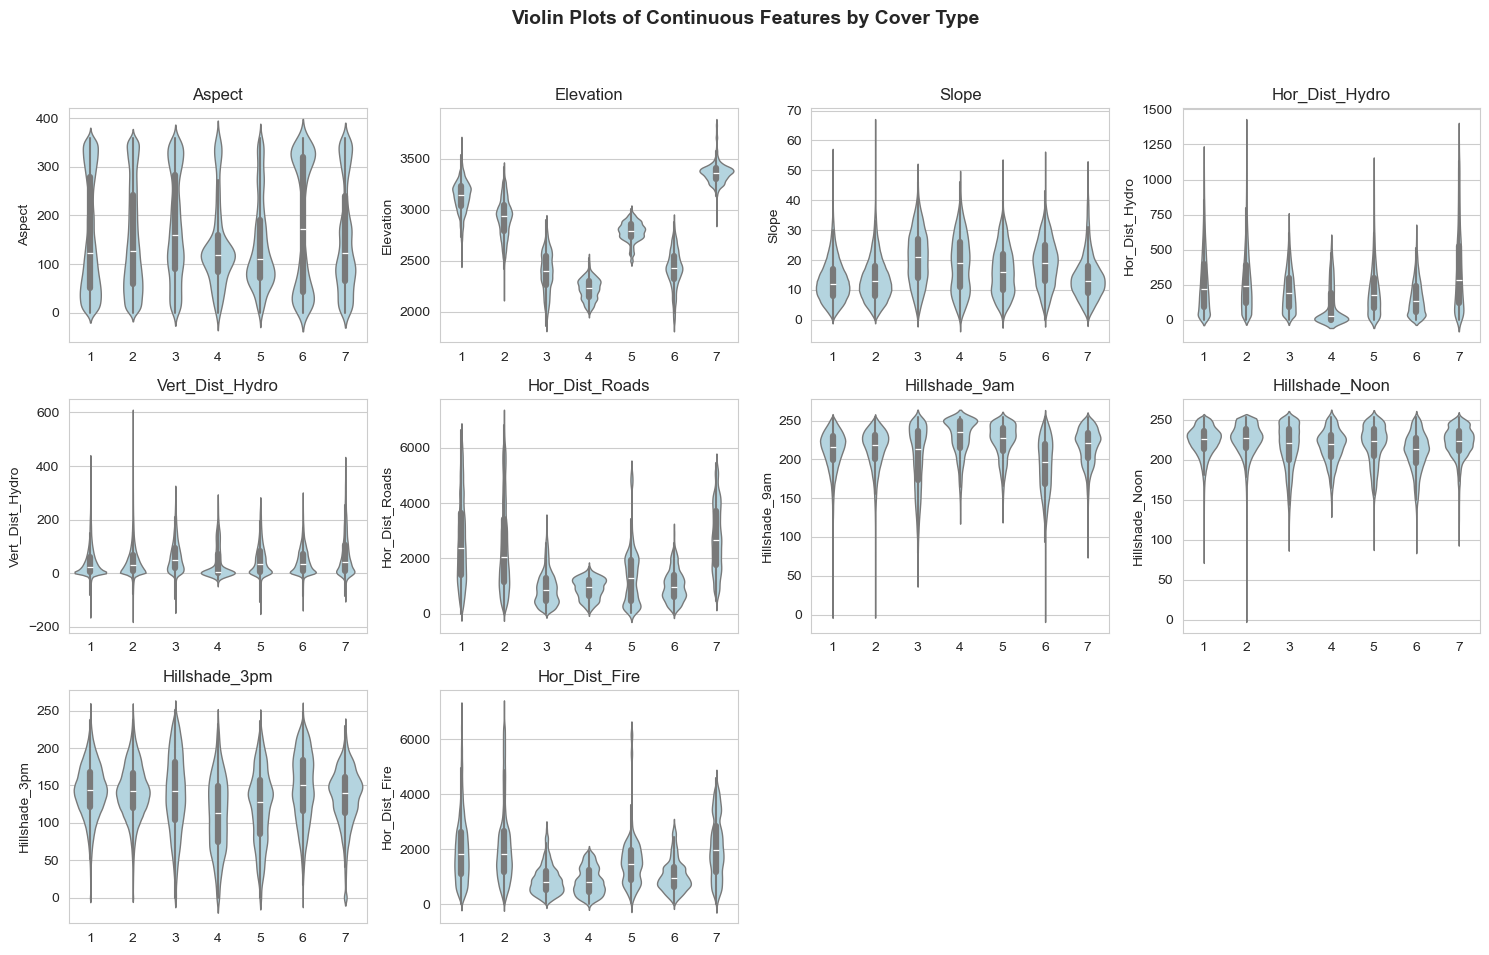

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))


for i, col in enumerate(list(shortened_columns.values())):
    plt.subplot(3, 4, i + 1)
    
    sns.violinplot(x=data['Cover_Type'], y=X_shortened[col], color="lightblue", linewidth=1)

    plt.title(col, fontsize=12)
    plt.xlabel("") 
    plt.xticks(fontsize=10)  


plt.suptitle('Violin Plots of Continuous Features by Cover Type', fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

plt.show()


Text(0.5, 1.0, 'Skewness of the functions')

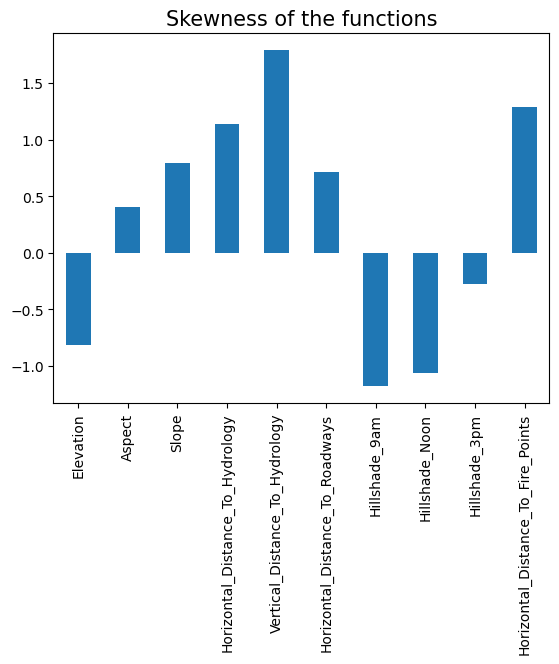

In [5]:
data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']].skew().plot(kind='bar')
plt.title("Skewness of the functions", fontsize=15)

We have 54 features. We definitely need to reduce the dimensionality. We can do so either by doing explicit feature selection by analysing feature importances, or by performing PCA. We will do both the methods and compare the results.

## Feature Selection

In [19]:
# We will only consider 5% of the whole dataset because the dataset is huge and we have computational limitations
data_sample = data.sample(frac=0.05, random_state=42)



In [20]:
data_sample.shape

(29051, 55)

In [21]:
data_sample['Cover_Type'].value_counts(normalize=True)*100

Cover_Type
2    48.469932
1    36.890296
3     6.109945
7     3.466318
6     3.032598
5     1.576538
4     0.454373
Name: proportion, dtype: float64

In [22]:
# split into features and target
X = data_sample.drop(['Cover_Type'], axis=1)
y = data_sample['Cover_Type'] - 1

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = f1_score(y_test, predictions, average='macro')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = f1_score(y_test, predictions, average='macro')
	print("Thresh=%.3f, n=%d, f1-score: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 74.42%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=54, f1-score: 74.42%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=54, f1-score: 74.42%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.003, n=52, f1-score: 74.42%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.003, n=51, f1-score: 74.10%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.004, n=50, f1-score: 73.70%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.004, n=49, f1-score: 74.32%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=48, f1-score: 74.39%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=47, f1-score: 73.74%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=46, f1-score: 74.57%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=45, f1-score: 75.07%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=44, f1-score: 74.24%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=43, f1-score: 72.90%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=42, f1-score: 74.72%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=41, f1-score: 75.40%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=40, f1-score: 73.99%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=39, f1-score: 75.11%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=38, f1-score: 75.28%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=37, f1-score: 76.14%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=36, f1-score: 75.10%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=35, f1-score: 76.44%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=34, f1-score: 76.10%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=33, f1-score: 74.65%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=32, f1-score: 72.81%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=31, f1-score: 73.02%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=30, f1-score: 71.42%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=29, f1-score: 72.40%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=28, f1-score: 71.80%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=27, f1-score: 71.65%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=26, f1-score: 67.47%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=25, f1-score: 66.45%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=24, f1-score: 64.39%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=23, f1-score: 58.37%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.015, n=22, f1-score: 59.18%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.015, n=21, f1-score: 53.06%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.015, n=20, f1-score: 53.10%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=19, f1-score: 52.56%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=18, f1-score: 52.38%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=17, f1-score: 52.64%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=16, f1-score: 53.13%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.021, n=15, f1-score: 52.18%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.021, n=14, f1-score: 52.35%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.021, n=13, f1-score: 51.66%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.023, n=12, f1-score: 44.43%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.026, n=11, f1-score: 44.30%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.026, n=10, f1-score: 44.51%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.030, n=9, f1-score: 44.05%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.032, n=8, f1-score: 44.46%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.033, n=7, f1-score: 42.86%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.042, n=6, f1-score: 42.41%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.052, n=5, f1-score: 38.69%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.054, n=4, f1-score: 35.90%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.056, n=3, f1-score: 35.79%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.085, n=2, f1-score: 34.48%
Thresh=0.091, n=1, f1-score: 34.34%


c:\Users\Sinjini\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [23]:
# Get feature importances from the model
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Get the top 35 features
top_35_features = feature_importances.head(35)
print(top_35_features)

                               Feature  Importance
0                            Elevation    0.090550
35                        Soil_Type_21    0.084773
15                         Soil_Type_1    0.055865
36                        Soil_Type_22    0.054473
10                   Wilderness_Area_0    0.052147
17                         Soil_Type_3    0.042136
52                        Soil_Type_38    0.033186
45                        Soil_Type_31    0.032152
12                   Wilderness_Area_2    0.030349
51                        Soil_Type_37    0.026222
25                        Soil_Type_11    0.026174
11                   Wilderness_Area_1    0.022697
16                         Soil_Type_2    0.020900
44                        Soil_Type_30    0.020778
42                        Soil_Type_28    0.020643
43                        Soil_Type_29    0.016158
29                        Soil_Type_15    0.016111
22                         Soil_Type_8    0.015758
46                        Soil_

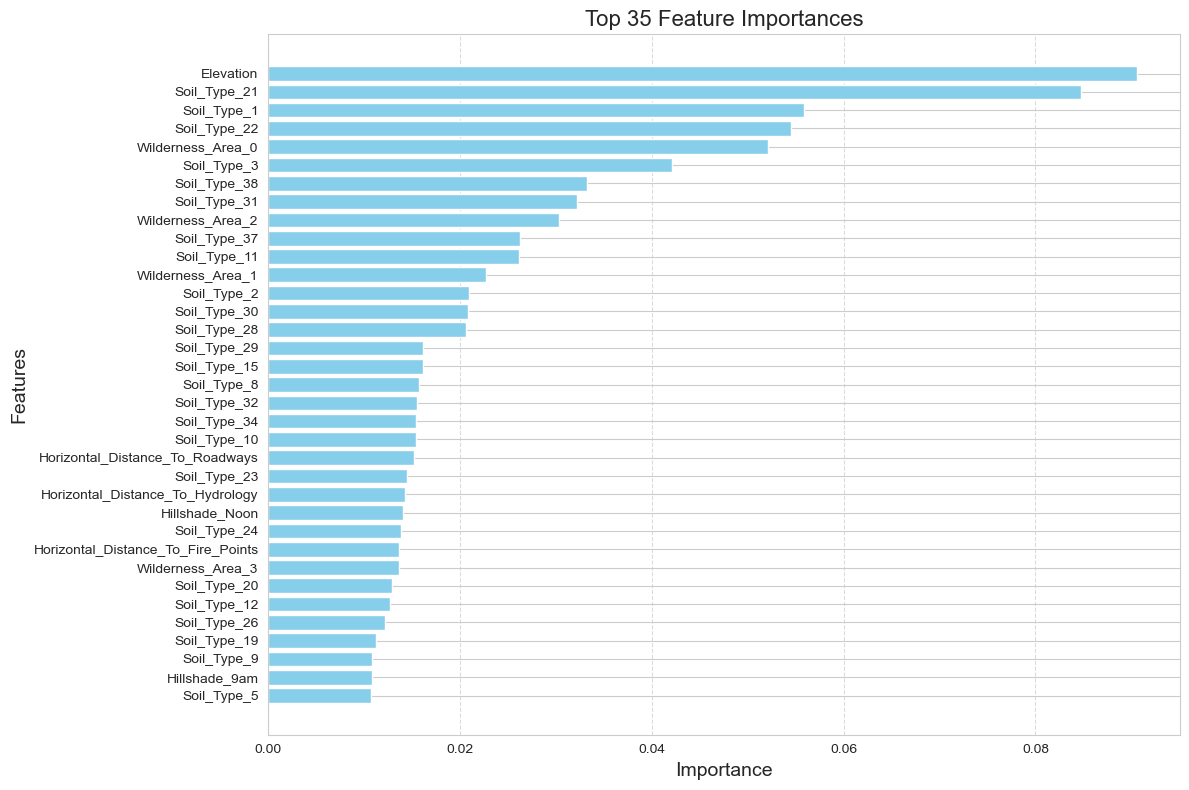

In [24]:
# Plotting feature importances with beautification
plt.figure(figsize=(12, 8))
plt.barh(top_35_features['Feature'], top_35_features['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 35 Feature Importances', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We will now train our SVM models only on the thesr top 35 features.

In [25]:
X_new = data_sample[top_35_features['Feature']]
X_new

,Elevation,Soil_Type_21,Soil_Type_1,Soil_Type_22,Wilderness_Area_0,Soil_Type_3,Soil_Type_38,Soil_Type_31,Wilderness_Area_2,Soil_Type_37,...,Soil_Type_24,Horizontal_Distance_To_Fire_Points,Wilderness_Area_3,Soil_Type_20,Soil_Type_12,Soil_Type_26,Soil_Type_19,Soil_Type_9,Hillshade_9am,Soil_Type_5
250728,3351,0,0,0,1,0,0,0,0,1,...,0,2271,0,0,0,0,0,0,192,0
246788,2732,0,0,0,0,0,0,0,1,0,...,0,912,0,0,0,0,0,0,231,0
407714,2572,0,0,0,0,0,0,0,1,0,...,0,2191,0,0,0,0,0,0,216,0
25713,2824,0,0,0,1,0,0,0,0,0,...,0,6478,0,0,0,0,0,0,233,0
21820,2529,0,0,0,1,0,0,0,0,0,...,0,4983,0,0,0,0,0,0,227,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460444,2825,0,0,1,0,0,0,0,1,0,...,0,272,0,0,0,0,0,0,216,0
391003,3148,0,0,0,1,0,0,0,0,0,...,0,743,0,0,0,0,0,0,211,0
351083,2763,0,0,0,0,0,0,0,1,0,...,0,1176,0,0,0,0,0,1,188,0
58044,2596,0,0,0,1,0,0,0,0,0,...,0,2186,0,0,0,0,1,0,226,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=42)

In [27]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# GridSearchCV on SVM

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}
# We make a classifier
svm_model = SVC()

grid = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [29]:
# We train it
best_model = grid.best_estimator_

# We print the best hyperparameters
print("Best Hyperparameters:", grid.best_params_)

Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
# Evaluating the model with the best hyperparameters

y_pred = best_model.predict(X_test_scaled)

test_accuracy1 = accuracy_score(y_test, y_pred)
test_f1_1 = f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy of model1 (Feature selection, unbalanced):", test_accuracy1)
print("Test F1-Score of model1 (Feature selection, unbalanced):", test_f1_1)

train_accuracy1 = accuracy_score(y_train, best_model.predict(X_train_scaled))
train_f1_1 = f1_score(y_train, best_model.predict(X_train_scaled), average='weighted')
print("Train Accuracy of model1 (Feature selection, unbalanced):", train_accuracy1)
print("Train F1-Score of model1 (Feature selection, unbalanced):", train_f1_1)


Test Accuracy of model1 (Feature selection, unbalanced): 0.7954336851766866
Test F1-Score of model1 (Feature selection, unbalanced): 0.7897124371062766
Train Accuracy of model1 (Feature selection, unbalanced): 0.8187853454634866
Train F1-Score of model1 (Feature selection, unbalanced): 0.8147448861746297


In [31]:
#joblib.dump(best_model, 'model1.pkl')

#### SMOTE-NC

In [32]:
categorical_features = [np.where(X_train.columns == col)[0][0] for col in X_train.columns if col.startswith('Wilderness_Area')] + [np.where(X_train.columns == col)[0][0] for col in X_train.columns if col.startswith('Soil_Type')]


# Initialize SMOTENC specifying which features are categorical
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Perform the resampling
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)


In [33]:
X_train_resampled.shape, y_train_resampled.shape

((68915, 35), (68915,))

In [34]:
y_train_resampled.value_counts()

Cover_Type
1    9845
0    9845
2    9845
6    9845
5    9845
4    9845
3    9845
Name: count, dtype: int64

In [35]:
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

svm_smote = SVC(C = 100, kernel = 'rbf', gamma = 1, random_state=42)  # using the best parameters obtained earlier
svm_smote.fit(X_train_resampled_scaled, y_train_resampled)


SVC(C=100, gamma=1, random_state=42)

In [36]:
#joblib.dump(svm_smote, 'model2.pkl')

In [ ]:
y_pred = svm_smote.predict(X_test_scaled)

test_accuracy2 = accuracy_score(y_test, y_pred)
test_f1_2 = f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy of model2 (Feature selection, balanced with SMOTE-NC):", test_accuracy2)
print("Test F1-Score of model2 (Feature selection, balanced with SMOTE-NC):", test_f1_2)

train_accuracy2 = accuracy_score(y_train_resampled, svm_smote.predict(X_train_resampled_scaled))
train_f1_2 = f1_score(y_train_resampled, svm_smote.predict(X_train_resampled_scaled), average='weighted')
print("Train Accuracy of model2 (Feature selection, balanced with SMOTE-NC):", train_accuracy2)
print("Train F1-Score of model2 (Feature selection, balanced with SMOTE-NC):", train_f1_2)

Test Accuracy of model2 (Feature selection, balanced with SMOTE-NC): 0.7775355667737495
Test F1-Score of model2 (Feature selection, balanced with SMOTE-NC): 0.7817015130452307
Train Accuracy of model2 (Feature selection, balanced with SMOTE-NC): 0.9055938474932889
Train F1-Score of model2 (Feature selection, balanced with SMOTE-NC): 0.9043969689141129


SMOTE-NC has led to overfitting

### Undersampling: Random undersampler

In [38]:
# For undersampling we are not going to use 5% of the data like we used for the previous two use cases. For this we are going to use the entirety of the dataset, because we are going to do undersampling, which will reduce the size of the dataset anyway.

X_new2 = data[top_35_features['Feature']]
y_new2 = data['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X_new2, y_new2, test_size=0.3, random_state=42)

rus = RandomUnderSampler(random_state=42, replacement=True)
X_train_resampled2, y_train_resampled2 = rus.fit_resample(X_train, y_train)


In [39]:
X_train_resampled2.shape, y_train_resampled2.shape, y_train_resampled2.value_counts()

((13664, 35),
 (13664,),
 Cover_Type
 1    1952
 2    1952
 3    1952
 4    1952
 5    1952
 6    1952
 7    1952
 Name: count, dtype: int64)

In [ ]:
X_train_resampled2_scaled = scaler.fit_transform(X_train_resampled2)
X_test_resampled2_scaled = scaler.fit_transform(X_test)

svm_rus = SVC(C = 100, kernel = 'rbf', gamma = 5, random_state=42)
svm_rus.fit(X_train_resampled2_scaled, y_train_resampled2)

y_pred = svm_rus.predict(X_test_resampled2_scaled)
test_accuracy3 = accuracy_score(y_test, y_pred)
test_f1_3 = f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy (Feature Selection, Random Undersampling):", test_accuracy3)
print("Test F1 Score (Feature Selection, Random Undersampling):", test_f1_3)

train_accuracy3 = accuracy_score(y_train_resampled2, svm_rus.predict(X_train_resampled2_scaled))
train_f1_3 = f1_score(y_train_resampled2, svm_rus.predict(X_train_resampled2_scaled), average='weighted')
print("Train Accuracy (Feature Selection, Random Undersampling):", train_accuracy3)
print("Train F1 Score (Feature Selection, Random Undersampling):", train_f1_3)


Test Accuracy (Feature Selection, Random Undersampling): 0.7109590141362218
Test F1 Score (Feature Selection, Random Undersampling): 0.7219179556874352
Train Accuracy (Feature Selection, Random Undersampling): 0.9381586651053864
Train F1 Score (Feature Selection, Random Undersampling): 0.9378594547070868


In [ ]:
#joblib.dump(svm_rus, 'model3.pkl')

['model3.pkl']

Overfitting again

### Cost Sensitive SVM 

A best practice for using the class weighting is to use the inverse of the class distribution present in the training dataset.

This heuristic is available directly by setting the class_weight to ‘balanced.’

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_cost_sensitive = SVC(C = 100, kernel = 'rbf', gamma = 5, random_state=42,class_weight='balanced')

svm_cost_sensitive.fit(X_train_scaled, y_train)



SVC(C=100, class_weight='balanced', gamma=5, random_state=42)

In [43]:
y_pred = svm_cost_sensitive.predict(X_test_scaled)
test_accuracy4 = accuracy_score(y_test, y_pred)
test_f1_4 = f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy (Feature Selection, Unbalanced, Cost Sensitive SVM):", test_accuracy4)
print("Test F1 Score  (Feature Selection, Unbalanced, Cost Sensitive SVM):", test_f1_4)

y_pred_train = svm_cost_sensitive.predict(X_train_scaled)
train_accuracy4 = accuracy_score(y_train, y_pred_train )
train_f1_4 = f1_score(y_train, y_pred_train, average='weighted')
print("Train Accuracy  (Feature Selection, Unbalanced, Cost Sensitive SVM):", train_accuracy4)
print("Train F1 Score (Feature Selection, Unbalanced, Cost Senstive SVM): ", train_f1_4)

Test Accuracy (Feature Selection, Unbalanced, Cost Sensitive SVM): 0.8207893529141809
Test F1 Score  (Feature Selection, Unbalanced, Cost Sensitive SVM): 0.8231430810768835
Train Accuracy  (Feature Selection, Unbalanced, Cost Sensitive SVM): 0.8670272928448488
Train F1 Score (Feature Selection, Unbalanced, Cost Senstive SVM):  0.8685037487169385


In [ ]:
#joblib.dump(svm_cost_sensitive, 'model4.pkl')

['model4.pkl']

With this method, the model does not overfit and the performance on both train and test set is fairly decent.

## PCA

Now we will do all of the following methods above, but on the data reduced by PCA instead of explicit feature selection.

In [44]:
# Looking at the data once again
data_sample.shape

(29051, 55)

In [45]:
X = data_sample.drop(['Cover_Type'], axis=1)
y = data_sample['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20335, 54), (8716, 54), (20335,), (8716,))

This time we will reduce the dimensionality not my explicit feature selection, but by PCA 

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



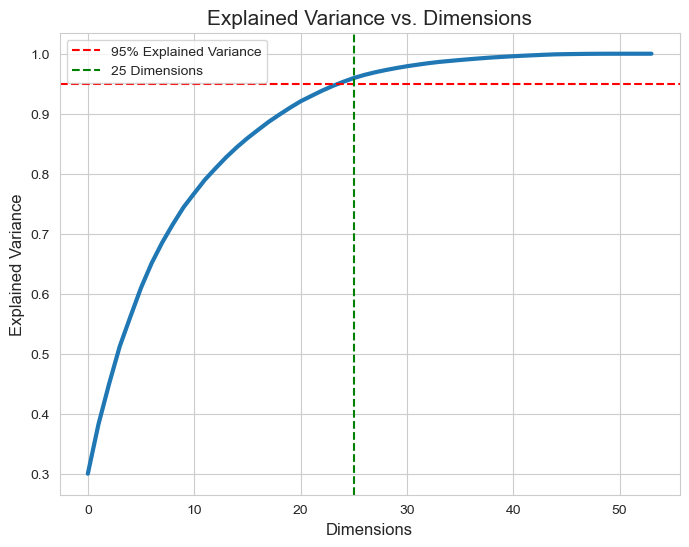

In [48]:
pca = PCA()
pca.fit(X_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

# Plot the cumulative explained variance

plt.figure(figsize=(8, 6))
plt.plot(cumsum, linewidth=3)
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Explained Variance')
plt.axvline(x=d, color='green', linestyle='--', label=f'{d} Dimensions')
plt.xlabel('Dimensions', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.title('Explained Variance vs. Dimensions', fontsize=15)
plt.grid(True)
plt.legend()
plt.show()

The plot shows that 25 dimensions can explain 95% of the variance in the data. Hence, we will proceed with 25 principal components. 

In [49]:
pca = PCA(n_components=d)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
print("Shape of the PCA transformed Train data: ", X_train_scaled_pca.shape)

X_test_scaled_pca = pca.transform(X_test_scaled)
print("Shape of the PCA transformed test data: ", X_test_scaled_pca.shape)

Shape of the PCA transformed Train data:  (20335, 25)
Shape of the PCA transformed test data:  (8716, 25)


With PCA, we reduced the features from 55 to 25.

Hyperparameter tuning to find the best hyperparameters to fit the PCA data

In [50]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}
# We make a classifier
svm_model = SVC()

grid = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid.fit(X_train_scaled_pca, y_train)

# We train it
best_model = grid.best_estimator_

# We print the best hyperparameters
print("Best Hyperparameters:", grid.best_params_)


y_pred = best_model.predict(X_test_scaled_pca)
y_pred_train = best_model.predict(X_train_scaled_pca)

test_accuracy5 = accuracy_score(y_test, y_pred)
test_f1_5 = f1_score(y_test, y_pred, average='weighted')
train_accuracy5 = accuracy_score(y_train, y_pred_train)
train_f1_5 = f1_score(y_train, y_pred_train, average='weighted')
print("Test Accuracy (PCA, unbalanced):", test_accuracy5)
print("Test F1-Score (PCA, unbalanced):", test_f1_5)

train_accuracy5 = accuracy_score(y_train, y_pred_train)
train_f1_5 = f1_score(y_train, y_pred_train, average='weighted')
print("Train Accuracy (PCA, unbalanced):", train_accuracy5)
print("Train F1-Score (PCA, unbalanced):", train_f1_5)


#joblib.dump(best_model, 'model5.pkl')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Test Accuracy (PCA, unbalanced): 0.79669573198715
Test F1-Score (PCA, unbalanced): 0.7920247665150856
Train Accuracy (PCA, unbalanced): 0.8380132776001967
Train F1-Score (PCA, unbalanced): 0.8349319018853395


### SMOTE-NC on PCA data

In [ ]:
categorical_features = [np.where(X_train.columns == col)[0][0] for col in X_train.columns if col.startswith('Wilderness_Area')] + [np.where(X_train.columns == col)[0][0] for col in X_train.columns if col.startswith('Soil_Type')]


# Initialize SMOTENC specifying which features are categorical
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Perform the resampling
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)




X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_train_resampled_scaled_pca = pca.fit_transform(X_train_resampled_scaled)

X_test_scaled_pca = pca.transform(X_test_scaled)

print("Shape of SMOTE-NC resampled PCA train data: ", X_train_resampled_scaled_pca.shape, y_train_resampled.shape)
print("Shape of test data in this case: ", X_test_scaled_pca.shape, y_test.shape)

svm_smote = SVC(C = 100, kernel = 'rbf', gamma = 1, random_state=42)  # using the best parameters obtained earlier
svm_smote.fit(X_train_resampled_scaled_pca, y_train_resampled)


y_pred = svm_smote.predict(X_test_scaled_pca)
y_pred_train = svm_smote.predict(X_train_resampled_scaled_pca)

test_accuracy6 = accuracy_score(y_test, y_pred)
test_f1_6 = f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy (PCA, balanced with SMOTE-NC):", test_accuracy6)
print("Test F1-Score of model2 (PCA, balanced with SMOTE-NC):", test_f1_6)

train_accuracy6 = accuracy_score(y_train_resampled, y_pred_train)
train_f1_6 = f1_score(y_train_resampled, y_pred_train, average='weighted')
print("Train Accuracy of model2 (PCA, balanced with SMOTE-NC):", train_accuracy6)
print("Train F1-Score of model2 (PCA, balanced with SMOTE-NC):", train_f1_6)






Shape of SMOTE-NC resampled PCA train data:  (68915, 25) (68915,)
Shape of test data in this case:  (8716, 25) (8716,)
Test Accuracy (PCA, balanced with SMOTE-NC): 0.7696190913262965
Test F1-Score of model2 (PCA, balanced with SMOTE-NC): 0.7743552443315583
Train Accuracy of model2 (PCA, balanced with SMOTE-NC): 0.9108757164623087
Train F1-Score of model2 (PCA, balanced with SMOTE-NC): 0.9098254057879521


In [ ]:
#joblib.dump(svm_smote, 'model6.pkl')


['model6.pkl']

### Random Undersampling on PCA data


In [ ]:
X_new2 = data.drop(['Cover_Type'], axis=1)
y_new2 = data['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X_new2, y_new2, test_size=0.3, random_state=42)

rus = RandomUnderSampler(random_state=42, replacement=True)
X_train_resampled2, y_train_resampled2 = rus.fit_resample(X_train, y_train)




X_train_resampled2_scaled = scaler.fit_transform(X_train_resampled2)
X_test_scaled = scaler.transform(X_test)

X_train_resampled2_scaled_pca = pca.fit_transform(X_train_resampled2_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

print("Shape of Randomly undersampled PCA train data: ", X_train_resampled2_scaled_pca.shape, y_train_resampled2.shape)
print("Shape of test data in this case: ", X_test_scaled_pca.shape, y_test.shape)


svm_rus = SVC(C = 100, kernel = 'rbf', gamma = 5, random_state=42)
svm_rus.fit(X_train_resampled2_scaled_pca, y_train_resampled2)

y_pred = svm_rus.predict(X_test_scaled_pca)
test_accuracy7 = accuracy_score(y_test, y_pred)
test_f1_7 = f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy (PCA, Random Undersampling):", test_accuracy7)
print("Test F1 Score (PCA, Random Undersampling):", test_f1_7)

y_pred_train = svm_rus.predict(X_train_resampled2_scaled_pca)
train_accuracy7 = accuracy_score(y_train_resampled2, y_pred_train)
train_f1_7 = f1_score(y_train_resampled2, y_pred_train, average='weighted')
print("Train Accuracy (PCA, Random Undersampling):", train_accuracy7)
print("Train F1 Score (PCA, Random Undersampling):", train_f1_7)

Shape of Randomly undersampled PCA train data:  (13664, 25) (13664,)
Shape of test data in this case:  (174304, 25) (174304,)
Test Accuracy (PCA, Random Undersampling): 0.7012633100789425
Test F1 Score (PCA, Random Undersampling): 0.7114985965206639
Train Accuracy (PCA, Random Undersampling): 0.9403542154566745
Train F1 Score (PCA, Random Undersampling): 0.9400910811786964


In [53]:
#joblib.dump(svm_rus, "model7.pkl")

### Cost Sensitive SVM

In [ ]:
X_new, y = data_sample.drop(['Cover_Type'], axis=1), data_sample['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

svm_cost_sensitive = SVC(C = 100, kernel = 'rbf', gamma = 5, random_state=42,class_weight='balanced')

svm_cost_sensitive.fit(X_train_scaled_pca, y_train)

y_pred = svm_cost_sensitive.predict(X_test_scaled_pca)
test_accuracy8 = accuracy_score(y_test, y_pred)
test_f1_8 = f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy (PCA, Unbalanced, Cost Sensitive SVM):", test_accuracy8)
print("Test F1 Score  (PCA, Unbalanced, Cost Sensitive SVM):", test_f1_8)

y_pred_train = svm_cost_sensitive.predict(X_train_scaled_pca)
train_accuracy8 = accuracy_score(y_train, y_pred_train)
train_f1_8 = f1_score(y_train, y_pred_train, average='weighted')
print("Train Accuracy  (PCA, Unbalanced, Cost Sensitive SVM):", train_accuracy8)
print("Train F1 Score (PCA, Unbalanced, Cost Senstive SVM): ", train_f1_8)


Test Accuracy (PCA, Unbalanced, Cost Sensitive SVM): 0.8093162000917852
Test F1 Score  (PCA, Unbalanced, Cost Sensitive SVM): 0.8111318549614579
Train Accuracy  (PCA, Unbalanced, Cost Sensitive SVM): 0.8930907302680108
Train F1 Score (PCA, Unbalanced, Cost Senstive SVM):  0.8936574832568803


In [ ]:
#joblib.dump(svm_cost_sensitive, 'model8.pkl')

['model8.pkl']

## Summary of the algorithms implemented

In [ ]:
pd.DataFrame({'Model': ['SVM', 'SVM', 'SVM', 'Cost Sensitive SVM', 'SVM', 'SVM', 'SVM','Cost Sensitve SVM'],
             'Dimensionality reduction method': ['Feature Selection', 'Feature Selection', 'Feature Selection', 'Feature Selection', 'PCA', 'PCA', 'PCA', 'PCA'],
             'Balanced/Unbalanced data': ['Unbalanced', 'Balanced with SMOTE-NC', 'Balanced with Undersampling', 'Unbalanced', 'Unbalanced', 'Balanced with SMOTE-NC', 'Balanced with Random Undersampling', 'Unbalanced'],
             'Test Accuracy': [test_accuracy1, test_accuracy2, test_accuracy3, test_accuracy4, test_accuracy5, test_accuracy6, test_accuracy7, test_accuracy8], 
             'Test F1 Score': [test_f1_1, test_f1_2, test_f1_3, test_f1_4, test_f1_5, test_f1_6, test_f1_7, test_f1_8],
             'Train Accuracy': [train_accuracy1, train_accuracy2, train_accuracy3, train_accuracy4, train_accuracy5, train_accuracy6, train_accuracy7, train_accuracy8],
             'Train F1 Score:': [train_f1_1, train_f1_2, train_f1_3, train_f1_4, train_f1_5, train_f1_6, train_f1_7, train_f1_8]})

,Model,Dimensionality reduction method,Balanced/Unbalanced data,Test Accuracy,Test F1 Score,Train Accuracy,Train F1 Score:
0,SVM,Feature Selection,Unbalanced,0.7954,0.7897,0.8187,0.8147
1,SVM,Feature Selection,Balanced with SMOTE-NC,0.7777,0.7817,0.9055,0.9043
2,SVM,Feature Selection,Balanced with Undersampling,0.7109,0.7219,0.9381,0.9378
3,Cost Sensitive SVM,Feature Selection,Unbalanced,0.8207,0.8231,0.8670,0.8685
4,SVM,PCA,Unbalanced,0.7967,0.7920,0.8380,0.8349
5,SVM,PCA,Balanced with SMOTE-NC,0.7696,0.7743,0.9108,0.9098
6,SVM,PCA,Balanced with Random Undersampling,0.7012,0.7114,0.9403,0.9400
7,Cost Sensitve SVM,PCA,Unbalanced,0.8093,0.8111,0.8931,0.8936
